<a href="https://colab.research.google.com/github/dynasty-29/Kaggle-BIPOC-Program-Projects/blob/main/Anime_Recommendation_A_KNN_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anime Recommendation using user rating: A KNN case study**

Introduction

K-nearest neighbors (KNN) is a simple and effective method for classifying data based on similarity. It works by identifying the K number of data points in a training dataset that are closest to a new data point, and using those K points to determine the class of the new data point.

It's a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

It's a supervised machine learning algorithm that's used to solve both classification and regression problem.

It's normally referred to as a lazy learning and non parametric algorithm.
Lazy because it doesn't perform any training when presented with training data. instead it stores data during the training time and only build a model when a query is performed on the dataset.
Non parametric because it doesn't make any assumption unlike other algorithms.


For this case studywill be creating a model that can be used to make anime recommendation based on user rating. The data was obtained from [kaggle](https://www.kaggle.com/code/advikmaniar/anime-recommendation-system/data).



In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data sets
anime = pd.read_csv('/content/anime.csv')

In [3]:
#previewing
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
#checking rows and columns
anime.shape

(12294, 7)

In [5]:
#checking null values
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
#checking skewness on rating column. 
# this will help us to decide on best way to replace null values
anime.rating.skew()


-0.5435700688578503

In [7]:
#filling in missing values with median as opposed to mean since the data is skewed

anime['rating'].fillna(anime['rating'].median(),inplace=True)

In [8]:
#dropping nulls from categorical columns
anime.dropna(inplace=True, axis = 0)

In [9]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [10]:
anime.shape

(12210, 7)

In [11]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# **EDA**

***1. Popular and unpopular anime***


In [12]:
#grouping anime by rating to determine the most popular
grouped_by_anime_id = anime.groupby(["anime_id","name","genre"])[["rating"]].mean().reset_index()
sorted_grouped_by_anime_id = grouped_by_anime_id.sort_values(by = ["rating"],ascending=False).reset_index()

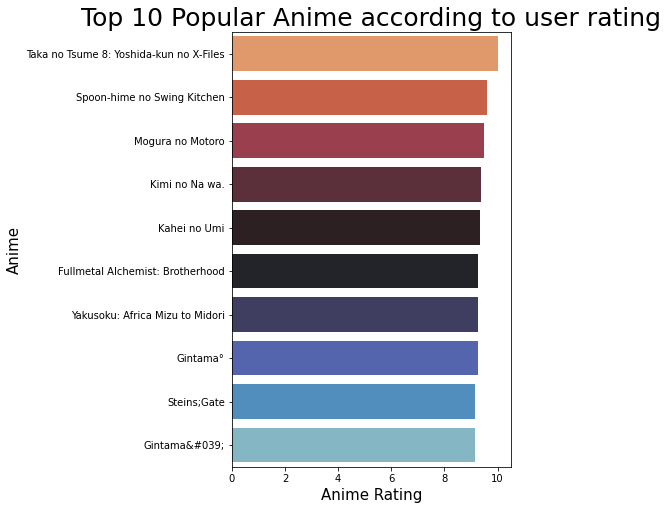

In [34]:
#visulaizing top popular anime by user rating
top10 = sorted_grouped_by_anime_id[:10]

label_font = {'fontsize': '15', 'fontweight' : '3'}
title_font = {'fontsize': '25', 'fontweight' : '5'}
plt.figure(figsize=(5,8));
sns.barplot(y='name',x='rating',data=top10,palette='icefire_r');
plt.xlabel('Anime Rating',fontdict=label_font);
plt.ylabel('Anime',fontdict=label_font);
plt.title('Top 10 Popular Anime according to user rating',fontdict=title_font);

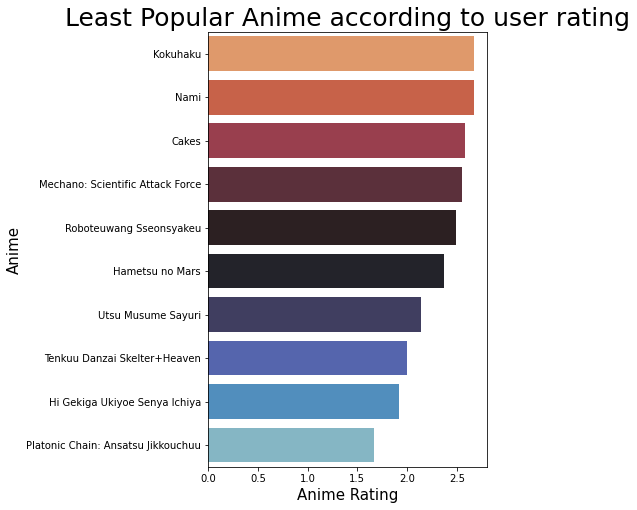

In [35]:
#visulaizing least popular anime by user rating
top10 = sorted_grouped_by_anime_id[-10:]

label_font = {'fontsize': '15', 'fontweight' : '3'}
title_font = {'fontsize': '25', 'fontweight' : '5'}
plt.figure(figsize=(5,8));
sns.barplot(y='name',x='rating',data=top10,palette='icefire_r');
plt.xlabel('Anime Rating',fontdict=label_font);
plt.ylabel('Anime',fontdict=label_font);
plt.title('Least Popular Anime according to user rating',fontdict=title_font);

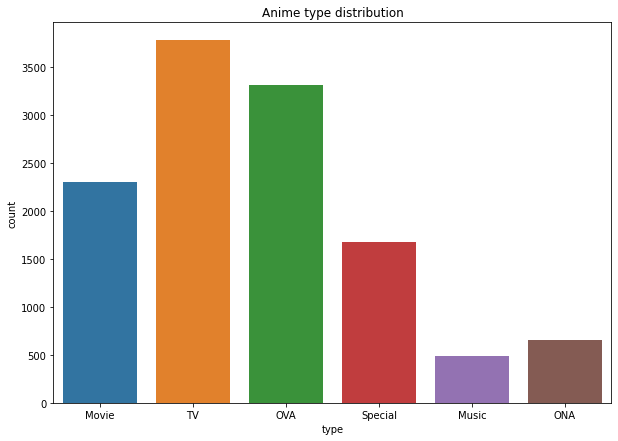

In [15]:
#checking type distribution

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(anime['type'], label = "Count", ax=ax).set(
    title="Anime type distribution") 
plt.show()

Most of the anime are in form of a tv-show

### **Word cloud for genre mapping to see the most liked genre**

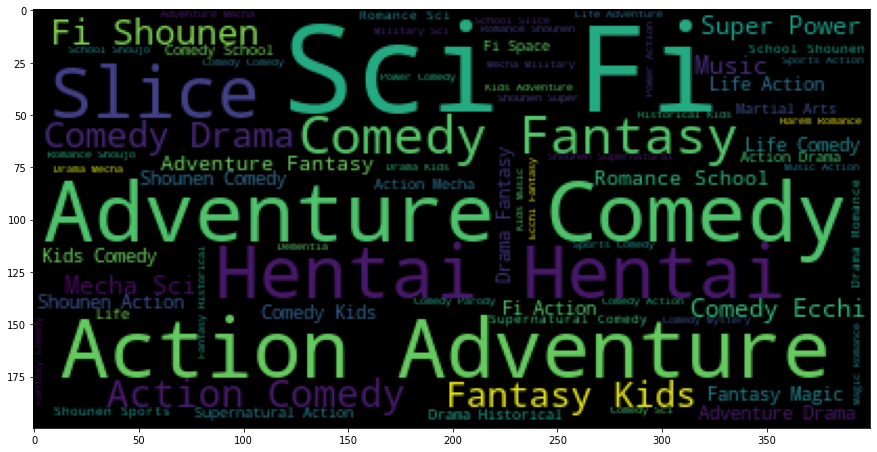

In [16]:
#lifting the column of interest
test_texts = anime['genre']

#Putting the sentences in a list
test_sentences = test_texts.tolist()

#Joining the sentences to one string
test_sentences_as_one_string =" ".join(test_sentences)

# Visualizing the test string
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
plt.imshow(WordCloud().generate(test_sentences_as_one_string))

Top of the list:
* Science Fiction
* Action
* Comedy
* Adventure
* Hentai

In [17]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [18]:
# we don't need the members column doing foward so we drop it
df = anime.drop(['members'], axis=1)
df.head(2)

,anime_id,name,genre,type,episodes,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26


In [19]:
#We now need to label encode our categorical columns
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column .
df['name']= label_encoder.fit_transform(df['name'])
df['genre']= label_encoder.fit_transform(df['genre'])
df['type']= label_encoder.fit_transform(df['type'])
df.head()

,anime_id,name,genre,type,episodes,rating
0,32281,5368,2683,0,1,9.37
1,5114,2831,161,5,64,9.26
2,28977,3323,534,5,51,9.25
3,9253,10191,3236,5,24,9.17
4,9969,3314,534,5,51,9.16


# **Modelling**

Preprocessing in KNN

Before fiting and building or meodel there are a few preprocessing steps we need to under take.

1. Indetify and separate our target variable from predictor variables.

2. Dimensional reduction using LDA. This helps in removing redudant features and dependent features by transforming the features from higher dimensions space to a space with lower dimensions.

In [20]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [21]:
#list that will track rmses
rmses = []

In [22]:
# setting target and predictor variables
x = df.drop(['rating'], axis=1)
y = df['rating']

In [23]:
X = pd.get_dummies(x)

In [24]:
# Splitting dataset to train and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [25]:
#scaled features
#transforming test based on values obtained from train (scaler should only be 
# fitted on train set then used to transform both train and test to prevent 
# data leakage caused by fitting on entire dataset)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


**Building a baseline model**

In [26]:
# Training and Predictions

#initial arbitrary value of 5
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn model 1 RMSE: {rmse}')

Mean Squared Error: 0.8426675397215397
Root Mean Squared Error: 0.9179692476992569


In [27]:
# comparing our four models

for x in rmses:
  print(f'\n{x}')


Knn model 1 RMSE: 0.9179692476992569


# **Hyper parameter tuning in KNN**

There are many ways in which the performance of the K Nearest Neighbours algorithm can be improved. Each of these methods is extensive and is heavily dependant on the nature of the dataset. Below are some of the methods that will be applying for this case study to improve the accuracy of our KNN model.

* Using different k ranges: One simple approach is to try a range of different values for K and evaluate the performance of the model using a validation set. You can then choose the value of K that gives the best performance.

* We can change the distance metric for different applications. This may help improve the accuracy of the algorithm. (i.e. Hamming distance for text classification). While most KNN models use Euclidean or Manhattan distance as the default distance metric, these metrics are simple and may not necessarily be the best distances to be considered in a wide variety of situations.

* We can implement weighted voting. In this case, the class of each of the K neighbours is multiplied by a weight proportional to the inverse of the distance from that point to the given test point. This would ensure that nearer neighbours contribute more to the final vote than the more distant ones.

* We can apply appropriate nearest-neighbour techniques. Techniques such as using k-d trees can be used to store the training observations that can be leveraged to decrease testing time. However, one should note that these methods tend to perform poorly in high dimensions. Locality sensitive hashing (LHS) is can be used for higher dimensions.

* Cross-validation: Another method is to use cross-validation to evaluate the performance of the model for different values of K. This involves dividing the training data into folds, training the model on a different fold for each value of K, and evaluating the performance on the remaining folds.

* Grid search: A more systematic approach is to use a grid search, which involves specifying a range of values for K and evaluating the model performance for each combination of hyperparameters.

In [28]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_neighbors': np.arange(3, 15, 2),
              'metric': ['minkowski', 'euclidean','manhattan']}

knnr = KNeighborsRegressor()
#finding values
search = GridSearchCV(estimator=knnr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 13}


In [29]:
# Training and Predictions
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=13, metric='manhattan')
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn further tuned model RMSE: {rmse}')


Mean Squared Error: 0.7836481017596402
Root Mean Squared Error: 0.8852390082681852


In [30]:
# comparing our four models

for x in rmses:
  print(f'\n{x}')


Knn model 1 RMSE: 0.9179692476992569

Knn further tuned model RMSE: 0.8852390082681852


Our model has improved after tuning making the model after tuning the best model so far.


This shows the importance of proper hyperparameter tuning depending on the algorithm and data set at hand.